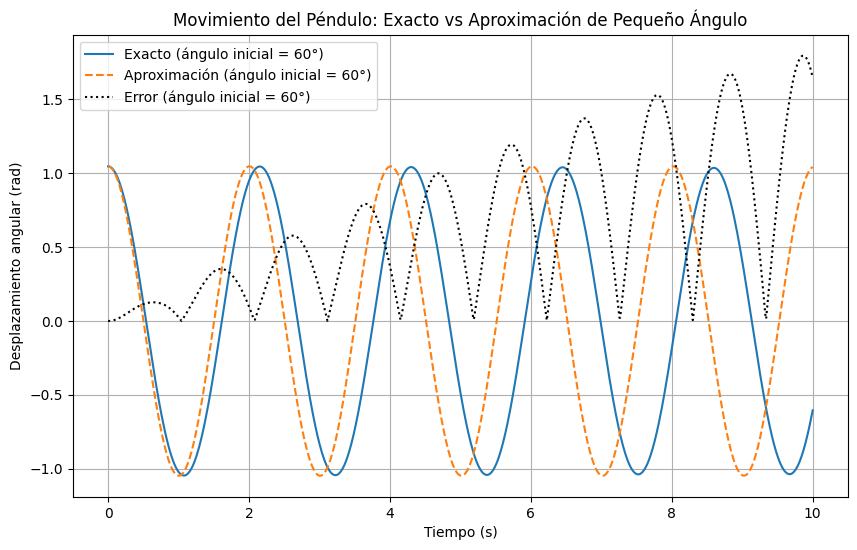

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

g = 9.81
L = 1.0

def pendulo_exacto(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = - (g / L) * np.sin(theta)
    return [dtheta_dt, domega_dt]

def pendulo_aprox(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = - (g / L) * theta 
    return [dtheta_dt, domega_dt]

def resolver_pendulo(angulo_inicial_rad, tiempo_max=10, method='RK45'):
    t_span = (0, tiempo_max)
    t_eval = np.linspace(0, tiempo_max, 1000)
    y0 = [angulo_inicial_rad, 0.0] 

    sol_exacta = solve_ivp(pendulo_exacto, t_span, y0, t_eval=t_eval, method=method)
    
    sol_aprox = solve_ivp(pendulo_aprox, t_span, y0, t_eval=t_eval, method=method)
    
    return sol_exacta.t, sol_exacta.y[0], sol_aprox.y[0]

def calcular_error(theta_exacta, theta_aprox):
    return np.abs(theta_exacta - theta_aprox)

def graficar_movimiento_pendulo(angulos_iniciales, tiempo_max=10):
    plt.figure(figsize=(10, 6))
    
    for angulo_inicial in angulos_iniciales:
        t, theta_exacta, theta_aprox = resolver_pendulo(np.radians(angulo_inicial), tiempo_max)

        plt.plot(t, theta_exacta, label=f'Exacto (ángulo inicial = {angulo_inicial}°)')
        plt.plot(t, theta_aprox, '--', label=f'Aproximación (ángulo inicial = {angulo_inicial}°)')

        error = calcular_error(theta_exacta, theta_aprox)
        plt.plot(t, error, label=f'Error (ángulo inicial = {angulo_inicial}°)', linestyle=':', color='k')

    plt.xlabel('Tiempo (s)')
    plt.ylabel('Desplazamiento angular (rad)')
    plt.title('Movimiento del Péndulo: Exacto vs Aproximación de Ángulo Pequeño')
    plt.legend()
    plt.grid(True)
    plt.show()

angulos_iniciales = [60]
graficar_movimiento_pendulo(angulos_iniciales)
